# Two Variable Newton Raphson

The Newton-Raphson method can be extended to optimize functions with two or more variables. In this example, we'll illustrate the Newton-Raphson method using a cost function with two variables $\theta_1$ and $\theta_2$. The goal is to minimize the cost function by finding the optimal values of these variables.

Suppose we have the following cost function:

$$J(\theta_1, \theta_2) = \theta_1^2 + \theta_2^2 - 4\theta_1 - 4\theta_2$$

We want to find the minimum of this cost function using the Newton-Raphson method. First, we need to compute the gradient vector and the Hessian matrix. The gradient vector $\nabla J$ is given by:

$$
\nabla J = \begin{bmatrix}
2\theta_1 - 4 \\
2\theta_2 - 4
\end{bmatrix}
$$

The Hessian matrix $\mathbf{H}$ is given by:

$$
\mathbf{H} = \begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}
$$

Now, we can apply the Newton-Raphson update rule:

$$
\begin{bmatrix}
\theta_1 \\
\theta_2
\end{bmatrix}_{k+1} = \begin{bmatrix}
\theta_1 \\
\theta_2
\end{bmatrix}_{k} - \mathbf{H}^{-1} \nabla J
$$

Let's perform a few iterations of the Newton-Raphson method with an initial guess:

**Initialization**:
- $\theta_1 = 2.0$
- $\theta_2 = 2.0$

**Iteration 1**:
1. Calculate the gradient and the Hessian matrix at the current parameters:

   $\nabla J = \begin{bmatrix}
   2 \cdot 2 - 4 \\
   2 \cdot 2 - 4
   \end{bmatrix} = \begin{bmatrix}
   0 \\
   0
   \end{bmatrix}$

   $\mathbf{H} = \begin{bmatrix}
   2 & 0 \\
   0 & 2
   \end{bmatrix}$

2. Update the parameters using the Newton-Raphson formula:

   $\begin{bmatrix}
   \theta_1 \\
   \theta_2
   \end{bmatrix}_{k+1} = \begin{bmatrix}
   \theta_1 \\
   \theta_2
   \end{bmatrix}_{k} - \mathbf{H}^{-1} \nabla J = \begin{bmatrix}
   2 \\
   2
   \end{bmatrix} - \begin{bmatrix}
   0 \\
   0
   \end{bmatrix} = \begin{bmatrix}
   2 \\
   2
   \end{bmatrix}$

The algorithm converges after the first iteration because the gradient is zero, indicating that we've reached a minimum.

In this example, the Newton-Raphson method finds the optimal values of $\theta_1$ and $\theta_2$ that minimize the cost function quickly because it's a simple quadratic function. In more complex functions, it may require multiple iterations to converge to the minimum.

In [1]:
import numpy as np

def cost_function(x):

    #  cost function 
    return x[0]**2 +  x[1]**2 - 4*x[0] - 4*x[1]
    

def gradient(x):
    # Calculate the gradient of the cost function.
    # For example: return np.array([2 * x[0], 2 * x[1]])
    return np.array([2 * x[0]-4, 2*x[1]-4])   # Partial derivative of f with respect to x
def hessian(x):
    # Calculate the Hessian matrix of the cost function.
 
    return np.array([[2,0], [0, 2]])

def newton_raphson(initial_guess, max_iterations, tolerance):
    x = initial_guess
    
    for iteration in range(max_iterations):
        grad = gradient(x)
        hess = hessian(x)
        if np.linalg.det(hess) == 0:
            print("Hessian matrix is singular. Unable to continue.")
            break
        delta_x = -np.linalg.inv(hess).dot(grad)
        x = x + delta_x
        
        if np.linalg.norm(delta_x) < tolerance:
            print(f"Converged to solution after {iteration} iterations.")
            break

    return x

# Set initial guess, maximum iterations, and tolerance
initial_guess = np.array([1.0, -20.0])
max_iterations = 100
tolerance = 1e-6

# Call the Newton-Raphson method
result = newton_raphson(initial_guess, max_iterations, tolerance)
print("Optimal solution:", result)
print("Minimum cost:", cost_function(result))


Converged to solution after 1 iterations.
Optimal solution: [2. 2.]
Minimum cost: -8.0


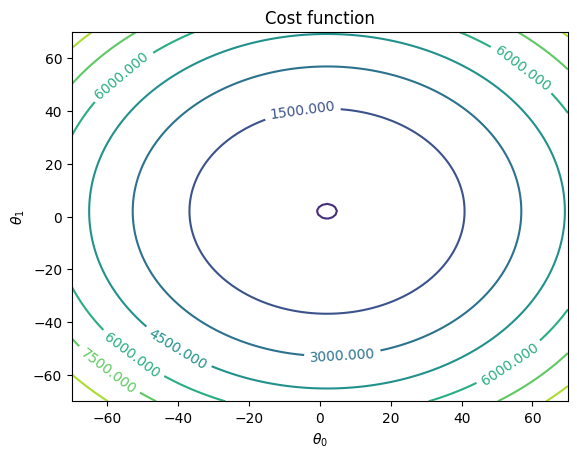

In [2]:
import matplotlib.pyplot as plt
x = np.linspace(-70, 70, 100)
y = np.linspace(-70, 70, 100)

X = np.meshgrid(x , y)
#theta_hist_array=np.array(theta_history)
cost_values = cost_function(X)
fig, ax = plt.subplots()
CS = ax.contour(X[0],X[1], cost_values)
ax.clabel(CS, inline=True, fontsize=10)
#ax.plot(theta_hist_array[:,0],theta_hist_array[:,1],'go')

ax.set_title('Cost function')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.show()